In [2]:
import numpy as np
import netCDF4 as nc
import glob,os
import calendar
from datetime import datetime,date
import array as arr
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import rc,cm,colorbar

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 15}
rc('font', **font)

In [9]:
os.chdir("/scratch/p/peltier/huoyilin/CanadaLakeData/IMS/")
year1=2004
input = xr.open_dataset('2004/ims2004056_4km_v1.2.nc')
for iyear in range(2004,2019):
    if calendar.isleap(iyear):
        monthstartday=arr.array('i', [1,32,61,92,122, 153, 183, 214, 245, 275, 306, 336, 367] ) 
    else:
        monthstartday=arr.array('i', [1,32,60,91,121, 152, 182, 213, 244, 274, 305, 335, 366])
    month1=0
    if iyear==year1:
        iday=56;file = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.2.nc')
        q=nc.Dataset(file,'r',format='NETCDF4');
        IMS_Surface_Values = q.variables['IMS_Surface_Values'][:]*0
        ny=len(IMS_Surface_Values[0]);nx=len(IMS_Surface_Values[0][0])
        IMS_Surface_Values_monthly=np.zeros((ny,nx))
        month1=2
    for imonth in range(month1,12):
        IMS_Surface_Values*=0
        count=0
        for iday in range(monthstartday[imonth],monthstartday[imonth+1]):
            file1 = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.2.nc')
            file2 = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.3.nc')
            if file1.exists():
                file=file1
                q=nc.Dataset(file,'r',format='NETCDF4');
                IMS_Surface_Values += q.variables['IMS_Surface_Values'][:]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land
                count+=1
            elif file2.exists():
                file=file2
                q=nc.Dataset(file,'r',format='NETCDF4');
                IMS_Surface_Values += q.variables['IMS_Surface_Values'][:]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land
                count+=1
        IMS_Surface_Values_monthly=IMS_Surface_Values/count
        filename=str(iyear)+'/ims'+str(iyear)+'-'+"%02d" % (imonth+1)+'_4km.nc'
        input.to_netcdf(filename)
        ncfile = nc.Dataset(filename,'r+')
        lu_index = ncfile.variables['IMS_Surface_Values'][:]
        lu_index = IMS_Surface_Values_monthly
        ncfile.variables['IMS_Surface_Values'][:] = lu_index
        ncfile.close()

In [70]:
import numpy as np
import netCDF4 as nc
q=nc.Dataset('/scratch/p/peltier/huoyilin/CanadaLakeData/IMS/imslatlon_4km.nc','r',format='NETCDF4')
#LakeIce= q.variables['IceFrac_A60']#for DM
##for GL25
lat = q.variables['lat'][:]
lon = q.variables['lon'][:]


In [2]:
os.chdir("/scratch/p/peltier/huoyilin/CanadaLakeData/IMS/")
q=nc.Dataset('2004/ims2004056_4km_v1.2.nc','r',format='NETCDF4')
IMS_Surface_Values = q.variables['IMS_Surface_Values'][0]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land
Lakemask=IMS_Surface_Values*0;Lakemask[IMS_Surface_Values==1]=1;Lakemask[IMS_Surface_Values==3]=1
ny=len(IMS_Surface_Values);nx=len(IMS_Surface_Values[0])
# Read latitude/longitude data
n = np.fromfile('imslon_4km.bin',dtype=np.float32).reshape(nx,ny)
lon = n.copy().view(np.float32);lon[lon>180]=lon[lon>180]-360;
lon=np.flip(lon, axis=0)
n = np.fromfile('imslat_4km.bin',dtype=np.float32).reshape(nx,ny)
lat = n.copy().view(np.float32) 
lake_list=['Superior','Huron','Michigan','Ontario', 'Erie','GreatBear','GreatSlave','Athabasca','Winnipegosis', 'Winnipeg']
lakenum=len(lake_list)
year1=2004
IMS_Surface_Values_lake_monthly=np.zeros((lakenum,178))
for iyear in range(2004,2019):
    if calendar.isleap(iyear):
        monthstartday=arr.array('i', [1,32,61,92,122, 153, 183, 214, 245, 275, 306, 336, 367] ) 
    else:
        monthstartday=arr.array('i', [1,32,60,91,121, 152, 182, 213, 244, 274, 305, 335, 366])
    month1=0
    if iyear==year1:
        iday=56;file = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.2.nc')
        q=nc.Dataset(file,'r',format='NETCDF4');
        IMS_Surface_Values = q.variables['IMS_Surface_Values'][0]*0
        #IMS_Surface_Values_monthly=np.zeros((178,ny,nx))
        month1=2
    for imonth in range(month1,12):
        IMS_Surface_Values*=0
        count=0
        for iday in range(monthstartday[imonth],monthstartday[imonth+1]):
            file1 = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.2.nc')
            file2 = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.3.nc')
            if file1.exists():
                q=nc.Dataset(file1,'r',format='NETCDF4');
                IMS_Surface_Values += q.variables['IMS_Surface_Values'][0]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land
                count+=1
            elif file2.exists():
                q=nc.Dataset(file2,'r',format='NETCDF4');
                IMS_Surface_Values += q.variables['IMS_Surface_Values'][0]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land
                count+=1
        IMS_Surface_Values=IMS_Surface_Values/count
        #IMS_Surface_Values_monthly[imonth-2+(iyear-year1)*12]=IMS_Surface_Values
        monthvalue=imonth-2+(iyear-year1)*12
        for lakeid in range(0,lakenum):
            q=nc.Dataset(lake_list[lakeid]+'_ims_mask.nc','r',format='NETCDF4')
            ims_lake=q.variables['mask_array']*Lakemask
            ims_lake_sum=np.sum(ims_lake)
            IMS_Surface_Values_lake_monthly[lakeid,monthvalue]=np.sum(ims_lake*IMS_Surface_Values)/ims_lake_sum
IMS_Surface_Values_lake_monthly=(IMS_Surface_Values_lake_monthly-1)/2    #linear transformation from 1,3 to 0-1
#for lakeid in range(0,lakenum):
with open('IMS_Surface_Values_lake_monthly.txt', 'w') as outfile:
    lakeid=0
#        np.savetxt(outfile, IMS_Surface_Values_lake_monthly[:,lakeid], fmt='%-8.4f')
    for slice_2d in IMS_Surface_Values_lake_monthly:
        outfile.write(lake_list[lakeid]+'\n')
        np.savetxt(outfile, slice_2d, fmt='%-8.4f')
        lakeid+=1
        # Writing out a break to indicate different slices...
        outfile.write('\n')
np.savetxt('IMS_Surface_Values_lake_monthly.dat',IMS_Surface_Values_lake_monthly) 

In [5]:
q=nc.Dataset('Michigan_ims_mask.nc','r',format='NETCDF4');
#q=nc.Dataset('test1.nc','r',format='NETCDF4');
ims_lake=q.variables['mask_array']
np.sum(ims_lake*Lakemask)/np.sum(ims_lake)

0.9972602739726028

In [34]:
GLERL_lake_monthly=np.zeros((6,180))+np.nan
monthstartday=arr.array('i', [1,32,61,92,122, 153, 183, 214, 245, 275, 306, 336, 367] ) 
for lakeid in range(0,5):
    lakename=lake_list[lakeid]
    #data = np.loadtxt('../NOAAGLERL/'+lakename[:3].lower()+'.txt', skiprows=1,usecols=range(31,47),converters = {3: lambda s: float(s.strip() or 0)})
    data=np.genfromtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/'+lakename[:3].lower()+'.txt', skip_header=1,usecols=range(32,48),filling_values=np.nan)/100
    for iyear in range(0,15):
        for imonth in range(0,6):
            GLERL_lake_monthly[lakeid,imonth+iyear*12]=np.nanmean(data[51+monthstartday[imonth]:51+monthstartday[imonth+1],iyear])
        imonth=10;GLERL_lake_monthly[lakeid,imonth+iyear*12]=np.nanmean(data[0:21,iyear+1]) #Nov.10-30
        imonth=11;GLERL_lake_monthly[lakeid,imonth+iyear*12]=np.nanmean(data[21:52,iyear+1])
        


<ipython-input-34-4009322e47ca>:9: RuntimeWarning: Mean of empty slice
  GLERL_lake_monthly[lakeid,imonth+iyear*12]=np.nanmean(data[51+monthstartday[imonth]:51+monthstartday[imonth+1],iyear])
<ipython-input-34-4009322e47ca>:10: RuntimeWarning: Mean of empty slice
  imonth=10;GLERL_lake_monthly[lakeid,imonth+iyear*12]=np.nanmean(data[0:21,iyear+1]) #Nov.10-30


In [33]:
GLERL_lake_daily=np.zeros((6,366))+np.nan
jan1=52#line 54 is Jan 1st in NOAAGLERL lake.txt
lastlineday=157#last line is June 5th, day 157 of a leap year
firstlineday=315#first line is Nov 10th, day 315 of a leap year
day1=56#2004 day 56 is the first day that has IMS data
for lakeid in range(0,5):
    lakename=lake_list[lakeid]
    #data = np.loadtxt('../NOAAGLERL/'+lakename[:3].lower()+'.txt', skiprows=1,usecols=range(31,47),converters = {3: lambda s: float(s.strip() or 0)})
    data=np.genfromtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/'+lakename[:3].lower()+'.txt', skip_header=1,usecols=range(32,48),filling_values=np.nan)/100
    GLERL_lake_daily[lakeid,0:day1-1]=np.nanmean(data[jan1:jan1+day1-1,1:],axis=1)#data[52,:]=Jan.1st
    GLERL_lake_daily[lakeid,day1-1:lastlineday]=np.nanmean(data[jan1+day1-1:],axis=1)
    GLERL_lake_daily[lakeid,firstlineday-1:367]=np.nanmean(data[0:jan1],axis=1)

<ipython-input-33-afae8f746e91>:12: RuntimeWarning: Mean of empty slice
  GLERL_lake_daily[lakeid,firstlineday-1:367]=np.nanmean(data[0:jan1],axis=1)
<ipython-input-33-afae8f746e91>:11: RuntimeWarning: Mean of empty slice
  GLERL_lake_daily[lakeid,day1-1:lastlineday]=np.nanmean(data[jan1+day1-1:],axis=1)


In [25]:
jan1+day1-1

107

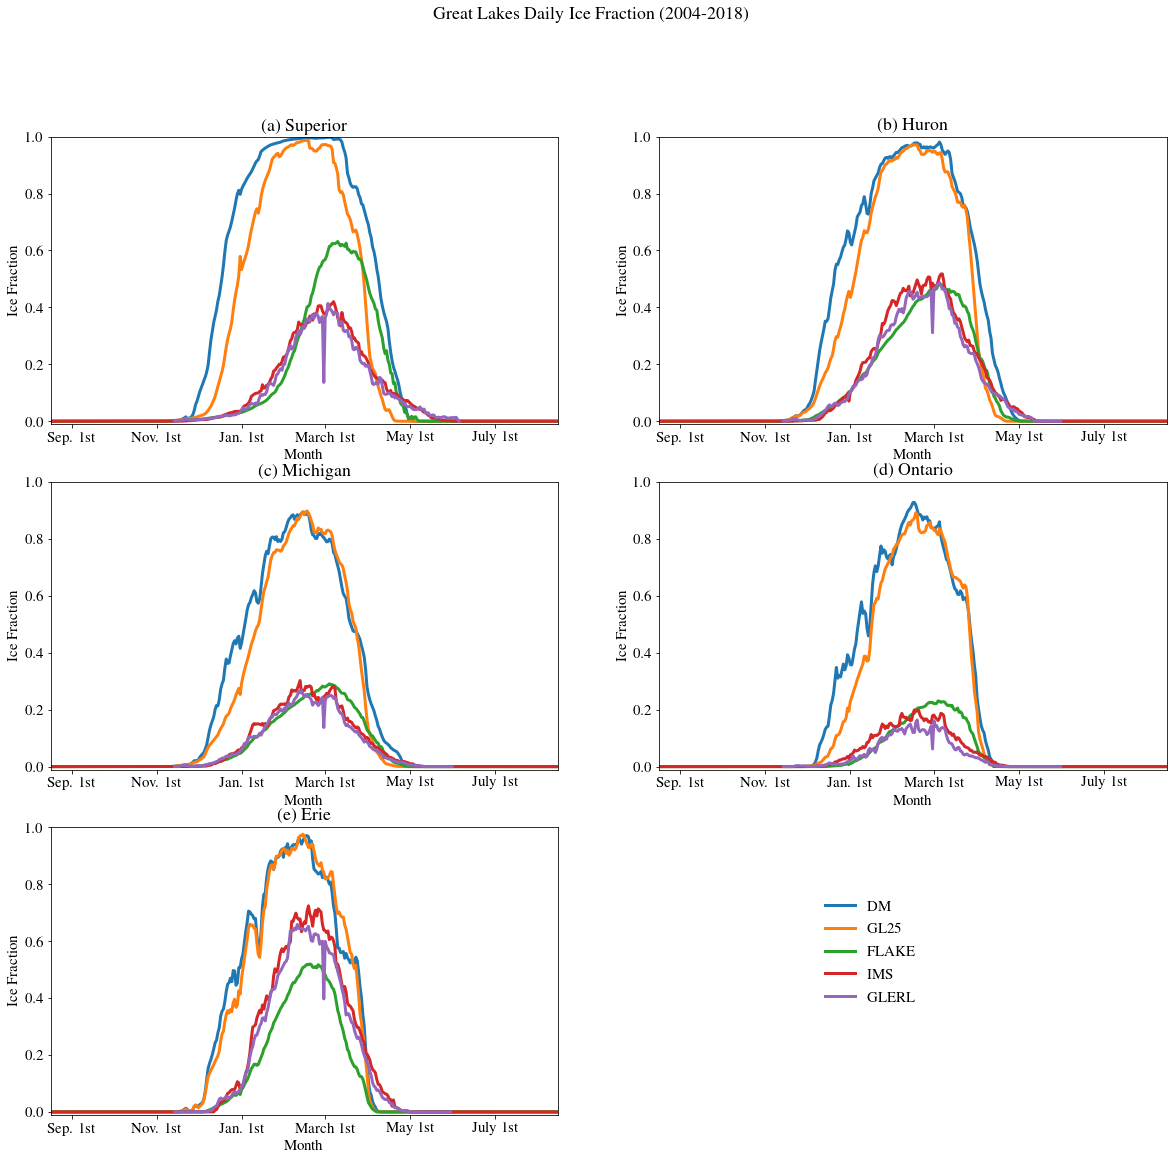

In [49]:
#IMS_Surface_Values_lake_monthly=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/IMS/IMS_Surface_Values_lake_monthly.dat') 
letters=['a','b','c','d','e','f','g']
xl=range(3,181);rollshift=0#monthly
xl=range(1,367);rollshift=137#daily
fig = plt.figure()
fig.set_size_inches(20, 18)
for lakeid in range(0, 5):
    ax1 = fig.add_subplot(3,2,lakeid+1)
    #ax1 = fig.add_subplot(3,2,lakeid-4)
#     if lakeid==5 or lakeid==6:
#         lakename=lake_list[lakeid]
#         ax1.title.set_text('('+letters[lakeid-5]+') '+lakename[0:5]+' '+lakename[5:])
#     else:
#         ax1.title.set_text('('+letters[lakeid-5]+') '+lake_list[lakeid])
    ax1.title.set_text('('+letters[lakeid]+') '+lake_list[lakeid])
    #plt.errorbar(x=xl,y=np.roll(IMS_Surface_Values_lake_daily[lakeid], shift = rollshift), yerr=np.roll(IMS_Surface_Values_lake_daily[lakeid+lakenum], shift = rollshift), linewidth=2, label = 'IMS')
    plt.plot(xl,np.roll(Ice_d[lakeid], shift = rollshift),linewidth=3, label = 'DM') 
    plt.plot(xl,np.roll(Ice_g[lakeid], shift = rollshift),linewidth=3, label = 'GL25') 
    plt.plot(xl,np.roll(Ice_f[lakeid], shift = rollshift),linewidth=3, label = 'FLAKE') 
    plt.plot(xl,np.roll(IMS_Surface_Values_lake_daily[lakeid], shift = rollshift),linewidth=3, label = 'IMS')
    plt.plot(xl,np.roll(GLERL_lake_daily[lakeid], shift = rollshift),linewidth=3, label = 'GLERL') 
#     plt.plot(xl,Ice_d[lakeid],linewidth=2, label = 'DM') 
#     plt.plot(xl,Ice_g[lakeid],linewidth=2, label = 'GL25') 
#     plt.plot(xl,Ice_f[lakeid],linewidth=2, label = 'FLAKE') 
#     plt.plot(xl,IMS_Surface_Values_lake_monthly[lakeid],linewidth=2, label = 'IMS') 
#     plt.plot(xl,GLERL_lake_monthly[lakeid,2:180], linewidth=2, label = 'GLERL') 
    plt.ylabel('Ice Fraction')
    #plt.xlabel('Day of the Year')
    plt.xlabel('Month')
    #ax.set_xticks((range(13,180,36)));ax.set_xticklabels(('2005-Jan','2008-Jan','2011-Jan','2014-Jan','2017-Jan'))
    #plt.setp(ax1, xticks=range(13,180,36), xticklabels=['2005-Jan','2008-Jan','2011-Jan','2014-Jan','2017-Jan'])
    plt.setp(ax1, xticks=[16,77,138,198,259,320], xticklabels=['Sep. 1st','Nov. 1st','Jan. 1st','March 1st','May 1st','July 1st'])
    plt.axis([1,365,-.011,1])
    #plt.axis([3,180,0,1])
    if lakeid==4:
        plt.legend(frameon=False,loc=2,bbox_to_anchor=(1.5,0.8))
plt.suptitle('Great Lakes Daily Ice Fraction (2004-2018)')
fig.patch.set_facecolor('xkcd:white')
plt.show()

In [12]:
np.nanmean(IMS_Surface_Values_lake_monthly[4,10:180:12]-GLERL_lake_monthly[4,12:180:12])

0.02661590058489007

In [ ]:
os.chdir("/scratch/p/peltier/huoyilin/CanadaLakeData/IMS/")
q=nc.Dataset('2004/ims2004056_4km_v1.2.nc','r',format='NETCDF4')
IMS_Surface_Values = q.variables['IMS_Surface_Values'][0]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land
Lakemask=IMS_Surface_Values*0;Lakemask[IMS_Surface_Values==1]=1;Lakemask[IMS_Surface_Values==3]=1
ny=len(IMS_Surface_Values);nx=len(IMS_Surface_Values[0])
# Read latitude/longitude data
n = np.fromfile('imslon_4km.bin',dtype=np.float32).reshape(nx,ny)
lon = n.copy().view(np.float32);lon[lon>180]=lon[lon>180]-360;
lon=np.flip(lon, axis=0)
n = np.fromfile('imslat_4km.bin',dtype=np.float32).reshape(nx,ny)
lat = n.copy().view(np.float32)
lake_list=['Superior','Huron','Michigan','Ontario', 'Erie','GreatBear','GreatSlave','Athabasca','Winnipegosis', 'Winnipeg']
lakenum=len(lake_list)
year1=2004
IMS_Surface_Values_lake_daily=np.zeros((lakenum*2,366))
for lakeid in range(0,lakenum):
    q=nc.Dataset(lake_list[lakeid]+'_ims_mask.nc','r',format='NETCDF4')
    ims_lake=q.variables['mask_array']*Lakemask
    ims_lake_sum=np.sum(ims_lake)
    for iday in range(1,367):
        year1=2004+(iday<56);yeargap=3*(iday>365)+1
        nyear=len(range(year1,2019,yeargap))
        IMS_Surface_Values_temp=np.zeros((nyear))+np.nan
        for iyear in range(year1,2019,yeargap):
            ii=int((iyear-year1)/yeargap)
            file1 = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.2.nc')
            file2 = Path(str(iyear)+'/ims'+str(iyear)+"%03d" % (iday)+'_4km_v1.3.nc')
            if file1.exists():
                q=nc.Dataset(file1,'r',format='NETCDF4');
                IMS_Surface_Values = q.variables['IMS_Surface_Values'][0]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land                IMS_Surface_Values_temp[ii]=np.sum(ims_lake*IMS_Surface_Values)/ims_lake_sum
            elif file2.exists():
                q=nc.Dataset(file2,'r',format='NETCDF4');
                IMS_Surface_Values = q.variables['IMS_Surface_Values'][0]# 0: Outside Coverage Area, 1: Open Water 2: Land Without Snow, 3: Sea Ice or Lake Ice 4: Snow Covered Land                IMS_Surface_Values_temp[ii]=np.sum(ims_lake*IMS_Surface_Values)/ims_lake_sum
        IMS_Surface_Values_lake_daily[lakeid,iday-1]=np.nanmean(IMS_Surface_Values_temp)
        IMS_Surface_Values_lake_daily[lakeid+lakenum,iday-1]=np.nanstd(IMS_Surface_Values_temp)
IMS_Surface_Values_lake_daily[0:lakenum,:]=(IMS_Surface_Values_lake_daily[0:lakenum,:]-1)/2    #linear transformation from 1,3 to 0-1
IMS_Surface_Values_lake_daily[lakenum:2*lakenum,:]/=2    #linear transformation from 1,3 to 0-1
np.savetxt('IMS_Surface_Values_lake_daily.dat',IMS_Surface_Values_lake_daily) 

In [46]:
lake_list=['Superior','Huron','Michigan','Ontario', 'Erie','GreatBear','GreatSlave','Athabasca','Winnipegosis', 'Winnipeg']
lakenum=len(lake_list)
freq='daily'
ntim=366#178 for monthly, 366 for daily
Ice_d=np.zeros((lakenum,ntim))
Ice_g=np.zeros((lakenum,ntim))
Ice_f=np.zeros((lakenum,ntim))
# q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfout/wrfconst_d01.nc','r',format='NETCDF4')
# wrf_lat=q.variables['XLAT'][0]
# wrf_lon=q.variables['XLONG'][0]
# nlat=len(wrf_lat);nlon=len(wrf_lat[0])
tim1=302;#2004/03
tim2=480;#2018/12
for lakeid in range(0, lakenum):
    if lakeid<5:
        modeld='14';modelg='13';modelf='78g';
    elif lakeid<8:
        modeld='69';modelg='67';modelf='76a';
    else:
        modeld='70';modelg='68';modelf='77a';
    q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+modeld+'/wrfout/wrfconst_d01.nc','r',format='NETCDF4')
    wrf_land=q.variables['LAKEMASK'][0]
    q=nc.Dataset('/project/p/peltier/huoyilin/wmo_basins_shp/'+lake_list[lakeid]+'_mask.nc','r',format='NETCDF4')
    wrf_lake=q.variables['mask_array'][:]*wrf_land
    wrf_lake[wrf_lake<=0]=np.nan
    q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+modeld+'/wrfavg_SMALL/wrflsm_d01_'+freq+'.nc','r',format='NETCDF4')
    LakeIce= q.variables['IceFrac_A60']#for DM
    for iday in range(0,366):
        year1=2004+(iday<55);yeargap=3*(iday>364)+1
        nyear=len(range(year1,2019,yeargap))
        for iyear in range(year1,2019,yeargap):
            itim=(date(iyear, 1, 1) - date(1979, 1, 1)).days+iday
            Ice_d[lakeid,iday]+=np.nanmean(LakeIce[itim]*wrf_lake)
        Ice_d[lakeid,iday]/=nyear
#     for itim in range(tim1,tim2):
#         Ice_f[lakeid,itim-tim1]= np.nanmean(LakeIce[itim]*wrf_lake)
            
    ##for GL25
    q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+modelg+'/wrfavg_SMALL/wrflsm_d01_'+freq+'.nc','r',format='NETCDF4')
    LAKE_ICEFRAC3D = q.variables['LAKE_ICEFRAC3D']
    LakeIce=LAKE_ICEFRAC3D[:,0,:,:];del LAKE_ICEFRAC3D#top layer ice
    LakeIce[LakeIce < 0] = 0
    for iday in range(0,366):
        year1=2004+(iday<55);yeargap=3*(iday>364)+1
        nyear=len(range(year1,2019,yeargap))
        for iyear in range(year1,2019,yeargap):
            itim=(date(iyear, 1, 1) - date(1979, 1, 1)).days+iday
            Ice_g[lakeid,iday]+=np.nanmean(LakeIce[itim]*wrf_lake)
        Ice_g[lakeid,iday]/=nyear
#     for itim in range(tim1,tim2):
#         Ice_g[lakeid,itim-tim1]= np.nanmean(LakeIce[itim]*wrf_lake)

    q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+modelf+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
    LakeIce=q.variables['IceFrac_H0.001']
    ntim=len(LakeIce);nlat=len(LakeIce[0]);nlon=len(LakeIce[0][0])
    LakeIce_daily=np.zeros( (int(ntim/8),nlat,nlon) )
    for itim in range (0,ntim-1,8):
        LakeIce_daily[int(itim/8)] = np.mean(LakeIce[itim+1:itim+9],axis=0)
    LakeIce=LakeIce_daily
    for iday in range(0,366):
        year1=2004+(iday<55);yeargap=3*(iday>364)+1
        nyear=len(range(year1,2019,yeargap))
        for iyear in range(year1,2019,yeargap):
            itim=(date(iyear, 1, 1) - date(1979, 1, 1)).days+iday
            Ice_f[lakeid,iday]+=np.nanmean(LakeIce[itim]*wrf_lake)
        Ice_f[lakeid,iday]/=nyear
#     for itim in range(tim1,tim2):
#         Ice_f[lakeid,itim-tim1]= np.nanmean(LakeIce[itim]*wrf_lake)


In [45]:
itim

9497

Text(0.5, 1.0, 'Northern Lakes Monthly Ice Fraction (2004-2018)')

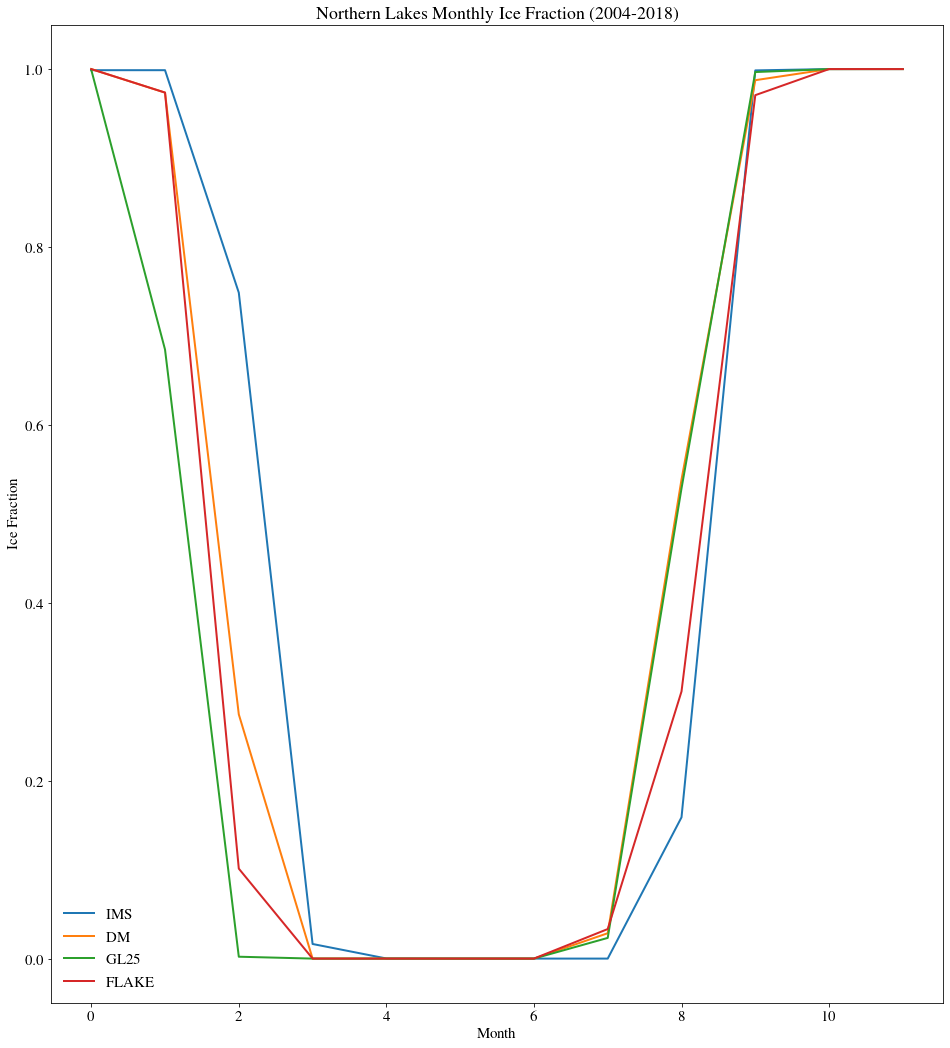

In [45]:
    fig = plt.figure()
    fig.set_size_inches(16, 18)

    plt.plot(range(0,12),IMS_Surface_Values_lake_monthly[lakeid,0:12],linewidth=2, label = 'IMS') 
    #plt.plot(range(3,181),GLERL_lake_monthly[lakeid,2:180], linewidth=2, label = 'GLERL') 
    plt.plot(range(0,12),Ice_d[lakeid,0:12],linewidth=2, label = 'DM') 
    plt.plot(range(0,12),Ice_g[lakeid,0:12],linewidth=2, label = 'GL25') 
    plt.plot(range(0,12),Ice_f[lakeid,0:12],linewidth=2, label = 'FLAKE') 
    plt.ylabel('Ice Fraction');plt.xlabel('Month')
    plt.legend(frameon=False)
    plt.title('Northern Lakes Monthly Ice Fraction (2004-2018)')

In [14]:
model='78g'
q=nc.Dataset('/scratch/p/peltier/huoyilin/mahdinia/wrfconst_d01_RC'+model+'_LAKEMASK_LAKE_DEPTH.nc','r',format='NETCDF4')
wrf_lat=q.variables['XLAT'][0]
wrf_lon=q.variables['XLONG'][0]
np.min(wrf_lon)

-96.809784